In [1]:
import gzip
import zipfile
import json
from collections import defaultdict
import math
import scipy.optimize
from sklearn import svm
import numpy as np
import pandas as pd
import string
import random
import string
from sklearn import linear_model
import matplotlib.pyplot as plt
path = "C://niha//cse158//data"

In [2]:
import json
 
filter_path = path+'//filter_all_t.json'
 
# Open and read the entire content of the JSON file
with open(filter_path, 'r') as json_file:
    filter_data_single_line = json_file.read()
 
# Parse the JSON data
try:
    json_filter_data = json.loads(filter_data_single_line)
    # Now you can work with the parsed JSON data
    print(json_filter_data)
except json.JSONDecodeError as err:
    print(f'Error decoding JSON: {err}')
    

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
imagerev_path = path+'//image_review_all.json'
#with open(imagerev_path, 'r') as json_file:
#    for line_number, line in enumerate(json_file,1):
#        try:
#            imagerev_data = json.loads(line)
#            print(imagerev_data)
#        except json.JSONDecodeError as err:
#            print(f'Error decoding JSON: {err}')

In [4]:
def getjson2(fname, maxno=-1):
    data_list = list()
    no = 0
    with open(fname, 'r') as json_file:
        for line_number, line in enumerate(json_file,1):
            try:
                imagerev_data = json.loads(line)
                data_list.append(imagerev_data)
                no += 1
                if (maxno > -1) & (no >= maxno):
                    break
            except json.JSONDecodeError as err:
                print(f'Error decoding JSON: {err}')
        return data_list

In [5]:
imagerev_data = getjson2(imagerev_path)

In [6]:
json_filter_data = getjson2(filter_path)

In [7]:
filter_df = pd.DataFrame(json_filter_data)
imagerev_df = pd.DataFrame(imagerev_data)

In [8]:
imagerev_df

,business_id,user_id,rating,review_text,pics
0,605730f68cd0e3d69a52284b,113890892872599852766,4,We came for a birthday brunch and this place i...,[{'id': 'AF1QipPrls2G30PS3tyC55KBxUrKgy3ER0AB5...
1,605730f68cd0e3d69a52284b,100158382312395993536,5,"Cool place to hang out, have drinks. There is...",[{'id': 'AF1QipPj8FEVZrdpTZmRdjoOtzQyfGYSwJ0Ub...
2,605730f68cd0e3d69a52284b,113495161718980109602,2,This place doesn’t rock the senses when it com...,[{'id': 'AF1QipOP5poDTRQ4XXIM11buv5x9Ae-BNXwcq...
3,605730f68cd0e3d69a52284b,111259544401075262963,3,Pretty cool place to hang out with friends and...,[{'id': 'AF1QipMq84NEaCMdQtfrELbudJdQbTILp_5I_...
4,605730f68cd0e3d69a52284b,104285463275063919410,5,We saw this place the other day when we had re...,[{'id': 'AF1QipOTCVzPHHWTiQO_2UZNVeG5KMbcki6d5...
...,...,...,...,...,...
1487742,60401a5466e8bd764351f091,107790040475008770577,5,Ordered the Chicken Tikka Masala and Chicken K...,[{'id': 'AF1QipPGxTrlMSpYMC5riNRB0lliBOkMdLHfU...
1487743,60401a5466e8bd764351f091,102318676431181796476,5,Great shrimp tikka masala. A little too much r...,[{'id': 'AF1QipOnpe7cvJ7vCYNBZVjZwCaY8JkxIhuIp...
1487744,60401a5466e8bd764351f091,115604769413521307669,4,"Good food, great portions. The chicken I order...",[{'id': 'AF1QipOiqyQLlrJZ1cDNHnedTBqNUcnH-x0Fo...
1487745,60401a5466e8bd764351f091,101315114581473619145,4,Amazing is really good you guys should try it ...,[{'id': 'AF1QipPgzFbzmglj8tIeIU71pFsWE4slxI2Ax...


## Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of 64527 businesses on 1487747 records')

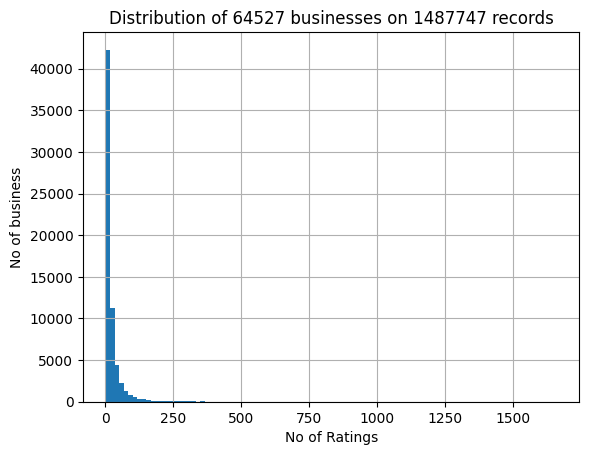

In [9]:
#rating_counts = imagerev_df.groupby("business_id").count()
#bins = [0, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000]  # Adjust bins as needed
#labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-100', '101-200', '201-300', '301-400', '401-500', '501-1000']
#rating_counts['range'] = pd.cut(rating_counts, bins=bins, labels=labels, right=False)
#range_counts = rating_counts['range'].value_counts().sort_index()

#plt.figure(figsize = (10,6))
#range_counts.plot(kind='bar')
#plt.title('Distribution of Number of Ratings for Businesses')
#plt.xlabel('Number of Ratings Range')
#plt.ylabel('Frequency')
#plt.xticks(rotation=45)
#plt.show()
dfgrpbusinesscnt = imagerev_df.groupby('business_id').count()
dfgrpbusinesscnt['user_id'].hist(bins=100)
plt.xlabel('No of Ratings')
plt.ylabel('No of business')
plt.title(f'Distribution of {dfgrpbusinesscnt.shape[0]} businesses on {imagerev_df.shape[0]} records')

In [10]:
len(imagerev_df['user_id'].unique())

868937

<AxesSubplot: >

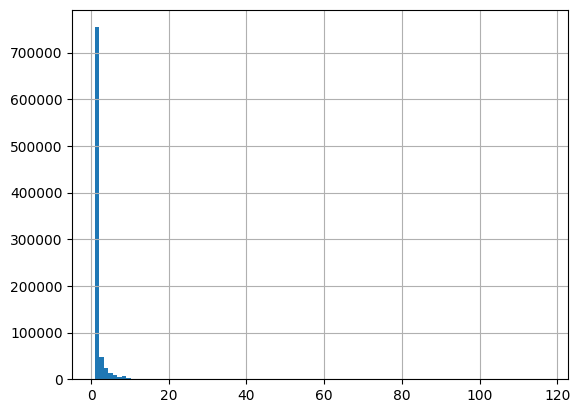

In [11]:
dfgrpusercnt = imagerev_df.groupby('user_id').count()
dfgrpusercnt['business_id'].hist(bins=100)

In [12]:
dfgrpratingcnt = imagerev_df.groupby('rating').count()
dfgrpratingcnt

,business_id,user_id,review_text,pics
rating,,,,
1,58645,58645,58645,58645
2,38009,38009,38009,38009
3,88533,88533,88533,88533
4,289106,289106,289106,289106
5,1013454,1013454,1013454,1013454


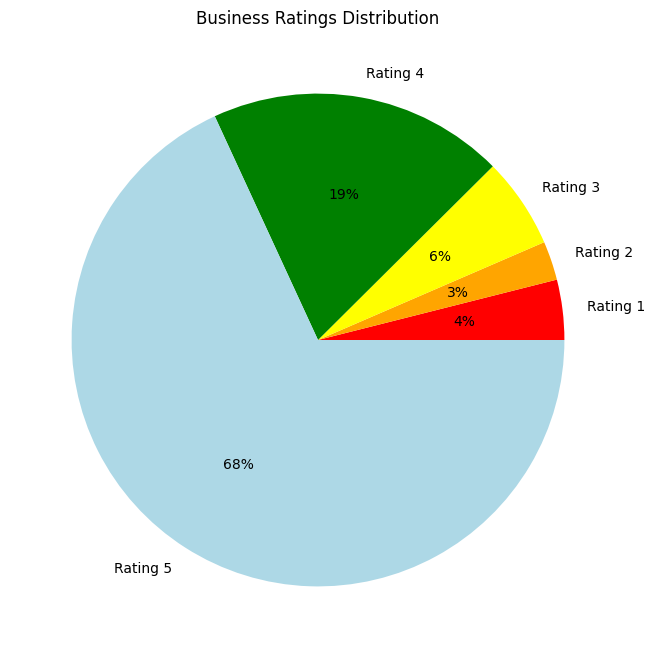

In [13]:
import matplotlib.pyplot as plt

ratings = list(dfgrpratingcnt['user_id'])
labels = ['Rating '+str(i)  for i in dfgrpratingcnt.index]
fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(ratings, labels=labels, autopct='%1.0f%%', startangle=0, \
        colors=['red', 'orange', 'yellow', 'green', 'lightblue'])
plt.title('Business Ratings Distribution')
plt.show()

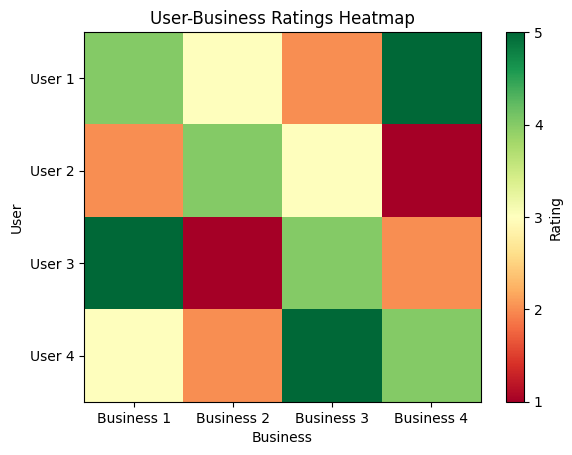

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data: user-business ratings
# Replace this with your actual data
ratings_data = np.array([
    [4, 3, 2, 5],
    [2, 4, 3, 1],
    [5, 1, 4, 2],
    [3, 2, 5, 4]
])

# Set the color map for the heatmap
cmap = plt.cm.RdYlGn

# Create the heatmap
plt.imshow(ratings_data, cmap=cmap, interpolation='nearest',\
           aspect='auto', vmin=1, vmax=5)

# Add colorbar with integer ticks
cbar = plt.colorbar(ticks=np.arange(1, 6), label='Rating')

# Set axis labels and title
plt.xlabel('Business')
plt.ylabel('User')
plt.title('User-Business Ratings Heatmap')

# Set ticks and labels for axis
plt.xticks(np.arange(ratings_data.shape[1]), ['Business 1', 'Business 2', 'Business 3', 'Business 4'])
plt.yticks(np.arange(ratings_data.shape[0]), ['User 1', 'User 2', 'User 3', 'User 4'])

# Display the heatmap
plt.show()

In [15]:
dft1 = pd.DataFrame({'u1':[1,2,3,4,5], 'u2':[3,4,7,2,1]})
dft1

,u1,u2
0,1,3
1,2,4
2,3,7
3,4,2
4,5,1


In [16]:
dfgrpuser=imagerev_df.groupby('user_id')

In [17]:
topusrcnt = 10
topusr = dfgrpusercnt['business_id'].\
            sort_values(ascending=False)[0:topusrcnt].index

In [18]:
topusr

Index(['100060262004832056023', '114607904590486797636',
       '116396021024611789723', '113090154661790710275',
       '111237841947380337726', '104819208193648646391',
       '113060025517917819155', '108972208682479297190',
       '100003947933664632255', '117495693473911053786'],
      dtype='object', name='user_id')